In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wrangle import wrangle, wrangle_explore
from sklearn.model_selection import train_test_split

# Stats
from scipy.stats import mannwhitneyu
from scipy.stats import levene

# Viewing Options
pd.set_option("display.max_rows", None, "display.max_columns", None) 

pd.reset_option("display.max_rows", "display.max_columns")
import warnings
warnings.filterwarnings("ignore")

# Random exploration of data

In [2]:
train, validate, test = wrangle_explore()

In [3]:
train.head(1)

,country,region,number_of_bags,harvest_year,grading_date,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,altitude_mean_meters,bag_weight,grading_month,grading_year,grading_day,excellent_rating
409,Colombia,pitalito,250,2013,2013-04-26,Caturra,Natural / Dry,7.67,7.67,7.5,7.67,7.92,7.42,10.0,10.0,10.0,7.5,83.33,0.11,0,0.0,Green,1,1000.0,70.0,4,2013,26,0


In [19]:
train.processing_method.value_counts()

Washed / Wet                 363
Natural / Dry                 81
Semi-washed / Semi-pulped     28
Name: processing_method, dtype: int64

In [20]:
df_plus = train[train.excellent_rating == 1]

In [21]:
df_plus.processing_method.value_counts()

Washed / Wet                 56
Natural / Dry                13
Semi-washed / Semi-pulped     5
Name: processing_method, dtype: int64

In [29]:
washed_wet = 363/56
washed_wet

6.482142857142857

In [30]:
natural_dry = 81/13
natural_dry

6.230769230769231

In [32]:
semi_pulped = 28/5
semi_pulped

5.6

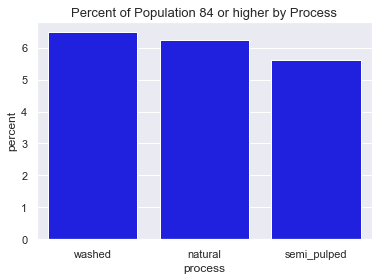

In [37]:
processed = ['washed', 'natural', 'semi_pulped']
percent = [washed_wet, natural_dry, semi_pulped]
ax = sns.barplot(processed, percent, color='blue')

ax.set_title('Percent of Population 84 or higher by Process', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='process', ylabel='percent')
plt.show()

In [72]:
s = (df_plus.variety.value_counts()/train.variety.value_counts()).sort_values(ascending = False)

In [38]:
df_plus = train[train.excellent_rating == 1]

In [48]:
caturra = 32/129
caturra

0.24806201550387597

In [49]:
other = 16/54
other

0.2962962962962963

In [50]:
bourbon = 13/120
bourbon

0.10833333333333334

In [51]:
typica = 8/106
typica

0.07547169811320754

In [52]:
catuai = 1/32
catuai

0.03125

In [53]:
yellow_bourbon = 2/17
yellow_bourbon

0.11764705882352941

In [54]:
mundo_novo = 2/14
mundo_novo

0.14285714285714285

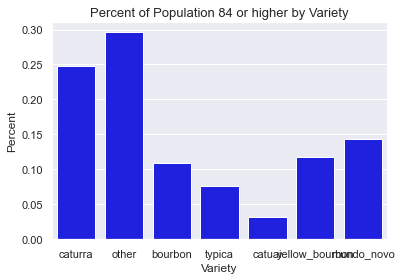

In [57]:
processed = ['caturra', 'other', 'bourbon', 'typica', 'catuai', 'yellow_bourbon', 'mundo_novo']
percent = [caturra, other, bourbon, typica , catuai, yellow_bourbon, mundo_novo]
ax = sns.barplot(processed, percent, color='blue')

ax.set_title('Percent of Population 84 or higher by Variety', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Variety', ylabel='Percent')
plt.show()